# Read data and create plots

Read data from csv files created for schools and college ratings. Create the plots



In [1]:
import requests as req
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:

mainfile = os.path.join("..","Project1_AmazonSites.xlsx")
# read sites 
xls = pd.ExcelFile(mainfile) 
sites_df=xls.parse('AmazonSites', dtype=str) 
sites_df.head()

,Amazon City,Site,Site Name,Address,City,State,Zip Code,Latitude,Longitude,Comments
0,Northern Virginia Area,Site1,Center for Innovation Technology,2214 Rock Hill Road,Herndon,VA,20170,38.96,-77.42,nan
1,Northern Virginia Area,Site2,Crystal City and Potomac Yard,3535 S Ball St,Arlington,VA,22202,38.84,-77.05,nan
2,Washington DC,Site1,Nationals Park/ D.C United Stadium,32-60 R St SW,Washington,DC,20024,38.86,-77.01,nan
3,Washington DC,Site2,Union Station,10 G St NE,Washington,DC,20002,38.89,-77,nan
4,Washington DC,Site3,Hill-East Neighborhood,1430 Pennsylvania Ave SE,Washington,DC,20003,38.88,-76.97,nan


In [3]:
# read data from Great Schools!

schoolsfile = os.path.join("Results","schools_GreatSchool.csv")
school_sites= pd.read_csv(schoolsfile)

In [4]:
#reduce to cities
cities = sites_df[['Amazon City', 'Site Name']]
cities = cities.merge(school_sites)


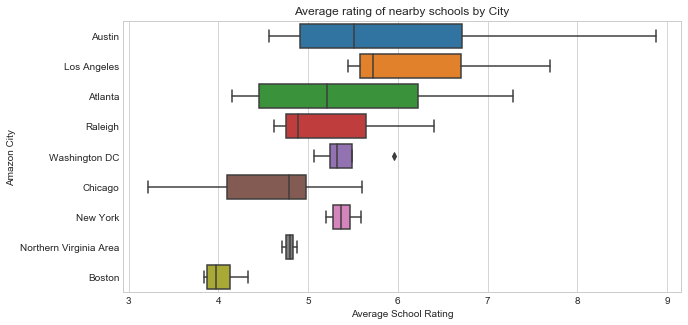

In [5]:
cities = cities.sort_values('Average School Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x='Average School Rating',y='Amazon City',data=cities)
plt.title("Average rating of nearby schools by City")
sch_rating_file = os.path.join("Plots","ratingsschoolscity.png")
plt.savefig(sch_rating_file)
plt.show()

In [6]:
ranking_schools=cities.groupby(['Amazon City'])['Average School Rating'].mean()
ranking_schools=ranking_schools.reset_index()
ranking_schools = ranking_schools.sort_values('Average School Rating', ascending=False)
ranking_schools = ranking_schools.rename(columns={'Amazon City':'City'})
ranking_schools = ranking_schools.drop([6])
ranking_schools = ranking_schools.drop(['Average School Rating'],axis=1)
ranking_schools


,City
4,Los Angeles
1,Austin
0,Atlanta
8,Washington DC
5,New York
7,Raleigh
3,Chicago
2,Boston


In [7]:
ordered = np.arange(8,0,-1)
ranking_schools['schools'] = ordered
ranking_schools = ranking_schools.set_index('City')
ranking_schools

,schools
City,
Los Angeles,8
Austin,7
Atlanta,6
Washington DC,5
New York,4
Raleigh,3
Chicago,2
Boston,1


In [8]:
ordered

array([8, 7, 6, 5, 4, 3, 2, 1])

## Colleges

In [9]:
collegefile = os.path.join("Results","Colleges.csv")
schools_df = pd.read_csv(collegefile)

schools_df['Rating'] = schools_df['Rating'].astype(float)
m = schools_df.groupby('Site Name')['Rating'].mean()
am = pd.DataFrame(m)
am = am.reset_index()
am = am.sort_values('Rating', ascending=False)
plt.figure(figsize=(5,10))
# sns.barplot(x='Rating',y='Site Name',data=am)
# plt.title("Average rating of nearby colleges")
# plt.savefig("nearbycollegerating.png")
# plt.show()

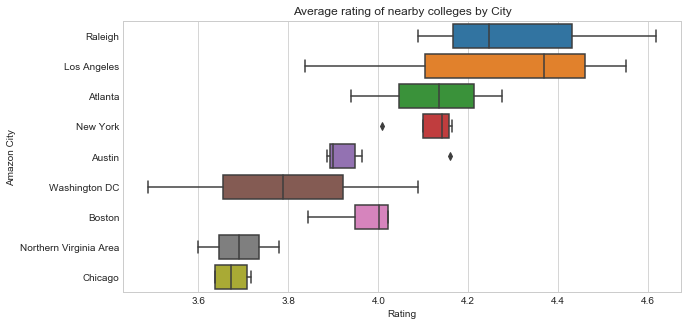

In [10]:
#reduce to cities
cities = sites_df[['Amazon City', 'Site Name']]
cities = cities.merge(am)
cities = cities.sort_values('Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x='Rating',y='Amazon City',data=cities)
plt.title("Average rating of nearby colleges by City")
col_rating_file = os.path.join("Plots","collegeratingscity.png")
plt.savefig(col_rating_file)
plt.show()

In [11]:
ranking_college=cities.groupby('Amazon City').mean()
ranking_college = ranking_college.reset_index()
ranking_college = ranking_college.sort_values('Rating', ascending=False)
ranking_college = ranking_college.rename(columns={'Amazon City':'City'})
ranking_college

,City,Rating
7,Raleigh,4.316540
4,Los Angeles,4.251865
0,Atlanta,4.121477
5,New York,4.114309
2,Boston,3.967280
1,Austin,3.950070
8,Washington DC,3.788264
6,Northern Virginia Area,3.690000
3,Chicago,3.674632


In [12]:
ranking_college = ranking_college.drop([6])
ranking_college = ranking_college.drop(['Rating'],axis=1)
ranking_college['college'] = ordered
ranking_college=ranking_college.set_index('City')
ranking_college


,college
City,
Raleigh,8
Los Angeles,7
Atlanta,6
New York,5
Boston,4
Austin,3
Washington DC,2
Chicago,1


In [13]:
ranking_schools['college']=ranking_college['college']

ranking_schools

,schools,college
City,,
Los Angeles,8,7
Austin,7,3
Atlanta,6,6
Washington DC,5,2
New York,4,5
Raleigh,3,8
Chicago,2,1
Boston,1,4


In [14]:
school_ranking_file = os.path.join("Results","school_ranking.csv")
ranking_schools.to_csv(school_ranking_file)